# Algoritmo de clusterización K-Means

**Clústering** se refiere a métodos que nos ayudan a formar subgrupos dentro de un conjunto de datos. La idea es que las observaciones que pertenezcan a un mismo grupo o *cluster* tengan **características similares** entre sí. 

A este tipo de algoritmos los clasificamos como **aprendizaje no supervisado** porque no tenemos una **variable de respuesta o dependiente** (no hay variable $y$). 

El algoritmo K-Means es uno de los más usados para encontrar grupos ocultos (o sospechados) sobre un conjunto de datos no etiquetados. Esto puede servir para confirmar -o desechar- alguna teoría que tuviéramos sobre nuestros datos. Además, puede ayudarnos a descubrir relaciones asombrosas entre conjuntos de datos, que de manera manual, no hubiéramos detectado. Una vez que el algoritmo ha terminado y obtenido las etiquetas, será fácil clasificar nuevos valores o muestras entre los grupos obtenidos.

Algunos ejemplos de casos de uso:
* Segmentación por comportamiento: Relacionar el carrito de compras de un usuarios, sus tiempos de acción e información de perfil.
* Categorización de inventario: Agrupar productos por actividad en sus ventas.
* Detectar anomalías o actividades sospechosas: Según el comportamiento es una web reconocer un "troll" (o un bot) de un usuario normal.

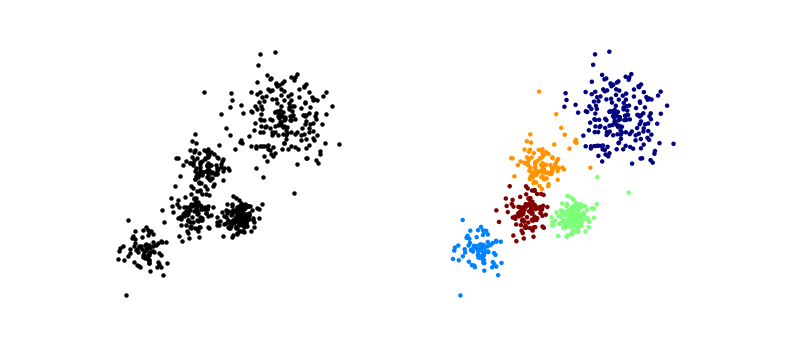

La premisa del algoritmo K-Means es definir $n$ grupos de tal manera que la distancia de los datos que pertenecen a cada grupo al centro de su respectivo grupo sea la más pequeña posible.

Matemáticamente, lo que queremos minimizar es la **within/intra-cluster sum of squares** (WCSS):
$$
W\biggl(\bigcup_{i=1}^k C_i\biggr) 
= \sum_{i=1}^k W(C_i) 
= \sum_{i=1}^k \biggl( \sum_{\boldsymbol x \in C_i} \| \boldsymbol x - \mu_i \|^2 \biggr)
$$

donde
- $k$ es el número de clústers que vamos a formar, 
- $C = \{C_1, C_2, \dots, C_k\}$, son los grupos a formar,
- $\boldsymbol x$ representan las observaciones,
- $\boldsymbol \mu_i$ es el punto céntrico del grupo $C_i$

## K-Means, paso a paso

1. Elegir el número de clústers.
  * En un inicio no sabemos cuál es el número de grupos ideal.
  * Podemos usar métodos como *el codo* para determinarlo (veremos ese método más adelante).
  * Inicialmente, los datos no pertenecen a ningún grupo.

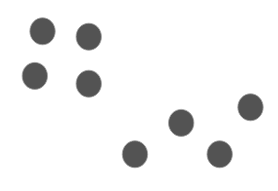

2. Inicializar coordenadas de los centroides.
  * Hay varias maneras de crear los centroides. La forma más sencilla es seleccionar $k$ puntos aleatorios de los datos.

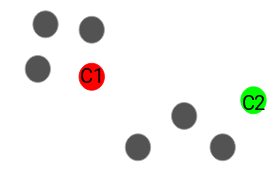

3. Asignar a cada punto un clúster.
  * Los grupos se asignan dependiendo del centroide más cercano.

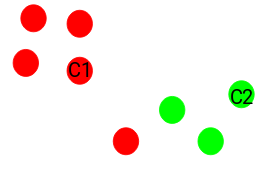

4. Recalcular los centroides 
  * Se promedian las coordenadas de los datos de cada grupo para obtener nuevos centroides.

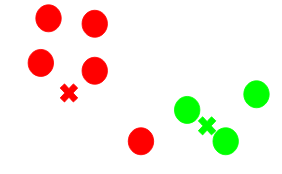

5. Repetir los pasos 3 y 4 hasta que los grupos dejen de cambiar.

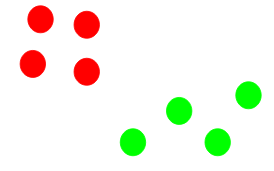

## Selección del número de grupos $k$

Pero, ¿cómo vamos a escoger el número de clúster adeacuado? Cuando aumentamos el número de clústers, la **WCSS** siempre disminuye, pero no siempre con la misma rapidez. Conforme vamos aumentando el número de grupos, la WCSS disminuye cada vez mas lento.

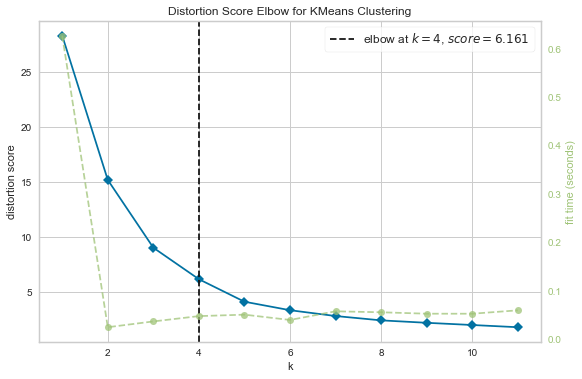

Una manera empírica para seleccionar el número de grupos es observar la gráfica enterior y buscar el punto donde se pase de tener un gran cambio a un cambio menor. 

Este es el **método del codo**. Como el nombre sugiere, hay que buscar el *doblez* del codo. El valor de $k$ donde se produce este doblez es el que hay que seleccionar.

Otra manera de seleccionar el valor de $k$ es con una métrica llamada **Silhouette Score**. 

Es una medida de la confiabilidad de que cada observación pertenezca a su respectivo clúster. Tiene un valor entre 0 y 1. Entre más cercano sea a 1, hay más certeza de que cada dato pertenece al grupo correspondiente. Cuando evaluemos para diferentes valores de $k$, seleccionamos aquél que genere el silhouette score más alto.



## Un ejemplo: segmentación de clientes

La segmentación clientes es una herramienta poderosa para poder identificar grupos con características particulares y necesidades por satisfacer. 

La manera más común para hacer una segmentación de clientes es con:
  * Información demográfica: edad, género, familia, estado civil, nivel de educación, ocupación, etc.
  * Información geográfica: dirección, ciudad, estado, código postal, etc.
  * Datos de comportamiento: hábitos de consumo, uso de productos/servicios, etc.

Algunos de los beneficios de la segmentación de clientes son:
  * Ayuda para definir el precio adecuado de un producto/servicio.
  * Enfocan las campañas de marketing a clientes con potencial de compra.
  * mejor diseño de estrategias de distribución de productos.
  * Selección de características de un producto.

Vamos a utilizar k-means para segmentar clientes de un centro comercial. Los datos están en el archivo `mall customers.csv` que se encuentra en el repositorio del curso.

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving mall_customers.csv to mall_customers.csv
User uploaded file "mall_customers.csv" with length 3981 bytes


In [2]:
# Importamos las librerías que usaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
# Cargamos los datos en un DataFrame
df = pd.read_csv('mall_customers.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Vemos los tipos de datos de cada columna (característica)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Resumen estadísticos de las variables númericas
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Quitaremos la columna CustomerID ya que no aporta información valiosa.
df = df.drop('CustomerID', axis=1)
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Text(0.5, 1.05, 'Distribución de las variables numéricas por género')

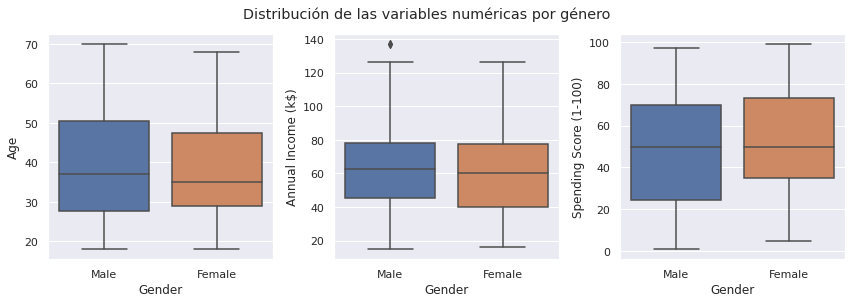

In [7]:
# Graficaremos las variables numéricas, incluimos el género

# Con subplot podemos incluir más de una gráfica por imagen.
# Vamos a graficar una cuadrícula de 1x3 imágenes
# También puedes graficar cada variable por separado.
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Graficamos los tres boxplot en una sola imagen.
sns.boxplot(data=df, y = 'Age', x='Gender', ax=axs[0])
sns.boxplot(data=df, y = 'Annual Income (k$)', ax=axs[1], x='Gender')
sns.boxplot(data=df, y = 'Spending Score (1-100)', ax=axs[2], x='Gender')

# Esta opción es para que se ajusten las imágenes a la cuadrícula
plt.tight_layout()

# Esta opción es para poner un título general para las tres gráficas
plt.suptitle('Distribución de las variables numéricas por género', y=1.05)

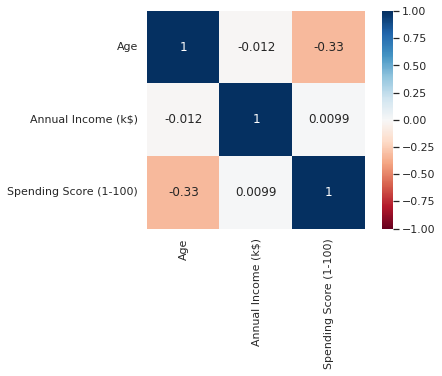

In [8]:
# Revisemos la correlación entre las variables numéricas. Graficamos la matriz de 
# correlación con un heatmap
df_corr = df.corr()
sns.heatmap(data=df_corr, vmin=-1, vmax = 1, cmap='RdBu', annot=True, square=True)

Text(0.5, 1.05, 'Gráfico de pares de las variables numéricas por género')

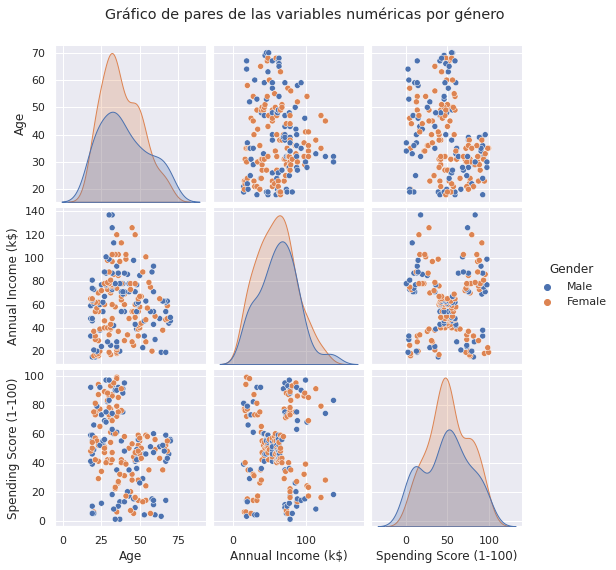

In [9]:
# Vamos a hacer los scatterplot entre las tres variables numéricas. 
# Usamos pairplot para hacerlos en una sola imagen.
# Opcional, podemos separar los datos por género. Esto lo hacemos agregando 
# Gender a los datos y usando el parámetro hue:
sns.pairplot(data=df, hue='Gender')
plt.suptitle('Gráfico de pares de las variables numéricas por género', y=1.05)

Podemos observar que las tres variables con las que vamos a trabajar tienen **escalas** muy diferentes:
  * La edad va de 18 a 70
  * El ingreso anual van de 15 a 137 kUSD
  * El puntaje de gasto varía de 1 a 100

Esto puede afectar el algoritmo de KMeans, puesto que es un método que utiliza **distancia euclidiana**. Lo recomentable es **normalizar** las variables para eliminar la diferencia en las escalas. Para normalizar variables en Python, utilizamos StandardScaler de SkLearn:

```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
```

In [10]:
# Vamos a escalar las tres variables con StandardScaler, el cual se encuentra 
# en SciKitLearn
from sklearn.preprocessing import StandardScaler

# Seleccionamos las variables a normalizar
numeric_cols = ['Age', 'Annual Income (k$)',	'Spending Score (1-100)']
X = df.loc[:, numeric_cols]

# Hacemos el escalamiento.
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# El escalador nos genera una matriz de numpy. Vamos a convertirlo en DF
X_norm = pd.DataFrame(X_norm, columns=numeric_cols)
X_norm.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


Ya con los valores normalizados, vamos a utilizar el método de K-Means para formar grupos y encontrar el número óptimo al correr el algoritmo para diferentes valores de $k$. Esto lo haremos con ayuda de un ciclo `for`. 

```python
# Importar la librería de Kmeans
from sklearn.cluster import KMeans
# Importar la librería para silhouette score
from sklearn.metrics import silhouette_score

# Probar para diferentes k
for(k in range(2,<k>):
  # Calcular el k-means
  model = KMeans(n_clusters = k)
  # Obtener los grupos o clusters
  groups = model.fit_predict(X)
  # Los centros de los grupos se guardan en cluster_centers_
  centros = model.cluster_centers_
  # Las distancias se guardan en inertia_
  wcss = model.inertia_
  # Calcular la Silouhette Score
  score = silhouette_score(X, groups)

# Mostrar los grupos (opcional)
# pseudocódigo!
plot(X, color=groups)
```



In [11]:
# # Importamos librerias en caso de no haberlo hecho antes
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Declaramos algunos arreglos. Los usuaremos para guardar los valores de la WCSS
 # y la silhouette score
kmax   = 16
grupos = range(2, kmax)
wcss   = []
sil_score = []

# Ciclo para calcular K-Means para diferentes k
for k in grupos:
    # Clustering
    model = KMeans(n_clusters=k, random_state = 47)

    # Obtener las etiquetas
    clusters = model.fit_predict(X_norm)

    # Guardar WCSS
    wcss.append(model.inertia_)

    # Guardar Silhouette Score
    sil_score.append(silhouette_score(X_norm, clusters))

Text(0.5, 1.0, 'Silhouette Score')

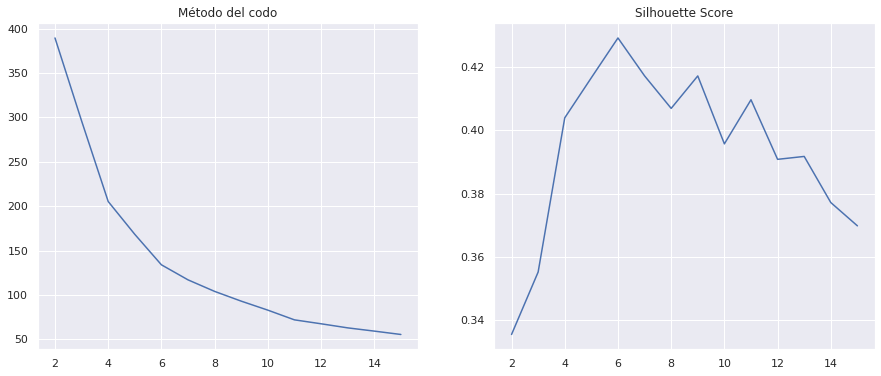

In [12]:
# Graficaremos el codo y silhouette score en la misma gráfica. Recorda que 
# subplots nos permite tener más gráficas en la misma figura.
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Primera figura es el codo
axs[0].plot(grupos, wcss)
axs[0].set_title('Método del codo')

# La segunda es el Silhouette Score
axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')

De las gráficas anteriores, 6 sepresenta un buen número de grupos. Volveremos a calcular el KMeans para 6 grupos.

In [13]:
# Generamos los 6 grupos
model = KMeans(n_clusters=6, random_state=47)
clusters = model.fit_predict(X_norm)

# Agregamos los clusters a nuestros DATOS ORIGINALES
df['Grupo'] = clusters.astype('str')
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Grupo
0,Male,19,15,39,4
1,Male,21,15,81,4
2,Female,20,16,6,0
3,Female,23,16,77,4
4,Female,31,17,40,0


Text(0.5, 1.05, '6 grupos de clientes')

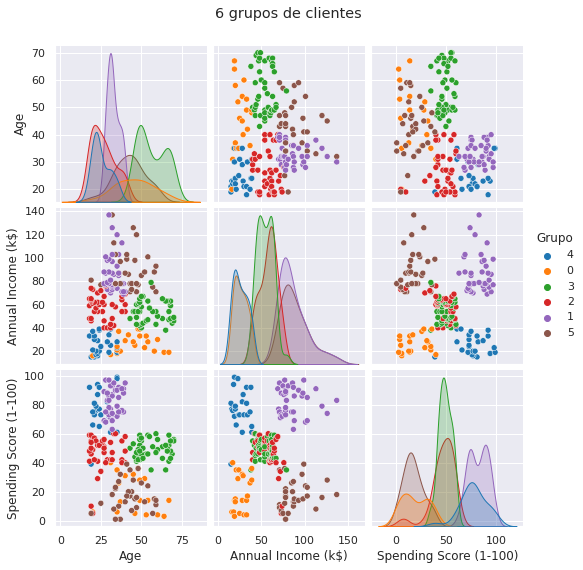

In [15]:
# Podemos agregar los colores en el pairplot para ver las características de 
# cada grupo Para el mapa de color revisar: 
# https://shorturl.at/jILPT

sns.pairplot(data=df, hue='Grupo', palette='tab10')
plt.suptitle('6 grupos de clientes', y=1.05)

In [16]:
# Vamos a graficar las 3 variables al mismo tiempo. Para ello, necesitamos 
# importar una librería más
import plotly.express as px

# Creamos la figura donde graficaremos
fig = px.scatter_3d(df, x = 'Age', y = 'Annual Income (k$)', 
                    z = 'Spending Score (1-100)', 
                    title='6 grupos de clientes',
                    color='Grupo',  
                    color_discrete_sequence=px.colors.qualitative.D3)

# mostramos la imagen
fig.show()

In [17]:
# Veamos las características de cada grupo (i.e. los centros)
df.groupby('Grupo').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Grupo,,,
0,45.523810,26.285714,19.380952
1,32.692308,86.538462,82.128205
2,26.512821,57.974359,46.692308
3,56.333333,54.266667,49.066667
4,25.250000,25.833333,76.916667
5,42.625000,89.437500,17.343750


In [18]:
# También veamos las dispersiones
df.groupby('Grupo').std()

,Age,Annual Income (k$),Spending Score (1-100)
Grupo,,,
0,11.766984,7.437357,12.555780
1,3.728650,16.312485,9.364489
2,7.104008,10.024935,11.907879
3,8.453079,8.975725,6.300794
4,5.326309,8.057762,13.416138
5,9.536856,16.599529,9.881914


Observando las gráficas y las tablas anteriores, podemos generar las siguiente conclusiones:
* El grupo 0 corresponde a adultos y adultos mayores con ingresos medios y con puntaje de compra medio.
* El grupo 1 corresponde a adultos jóvenes con ingresos altos y con puntaje de compra alto.
* El grupo 2 corresponde a personas con ingresos altos y con puntaje de compra bajo.
* El grupo 3 corresponde a jóvenes y adultos jóvenes con ingresos medios y con puntaje de compra medio.
* El grupo 4 corresponde a personas jóvenes con ingresos bajos y con puntaje de compra alto.
* El grupo 5 corresponde a personas adultas con ingresos bajos y con puntaje de compra bajo.

¿Qué grupos son adecuados para ofrecerles alguna promoción?

**Nota**: Cada vez que corramos el algoritmo de K-Means sin asignar un valor a random_state, puede ser  que el número de las etiquetas varíe, pero los grupos serán los mismos.